In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [3]:
df=pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

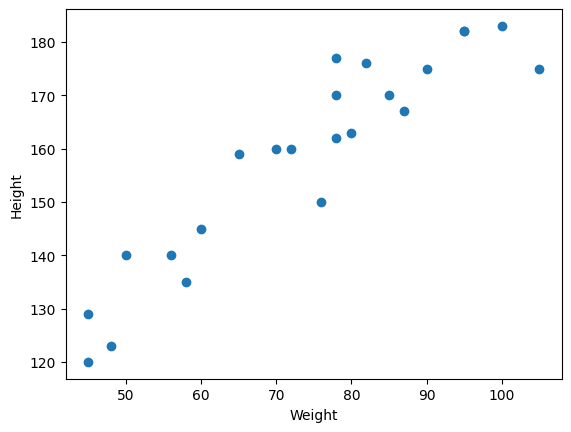

In [7]:
##scaterplot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [8]:
## Coleration
df.corr()
## highly positive correlated{0.93}

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [106]:
## Dependent and Independent features
X=df[['Weight']] ## Independent feature should be in 2d array or in a dataframe
Y=df[['Height']]    ## it can be as series or 1d array

In [107]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [108]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [109]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

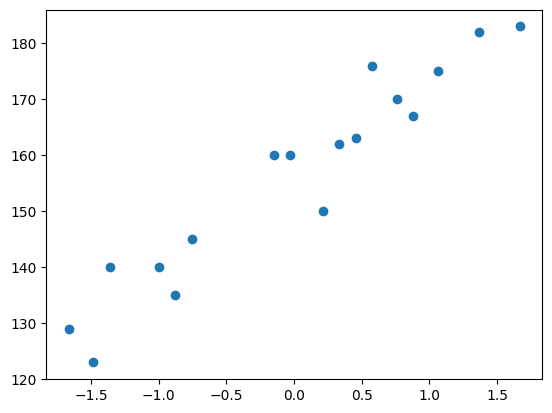

In [110]:

plt.scatter(X_train,Y_train)

In [111]:
## Apply simple linear regression
from sklearn.linear_model import LinearRegression

In [112]:
regressor=LinearRegression(n_jobs=-1)
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)
regressor.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [113]:
X_test
##print("The coefficient (Slope) =",regressor.coef_)

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [114]:
print("The intercept =",regressor.intercept_)

The intercept = [156.47058824]


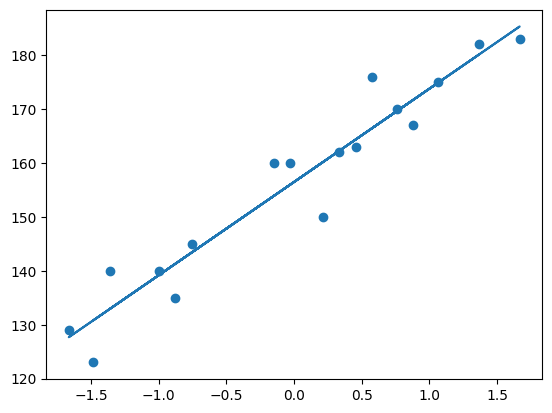

In [115]:
## Plot Training Data best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train))

In [116]:
## Pridiction on test data
y_pred_test=regressor.predict(X_test)
y_pred_test

array([[162.26499721],
       [162.26499721],
       [127.68347133],
       [180.07972266],
       [148.64197186],
       [190.55897293]])

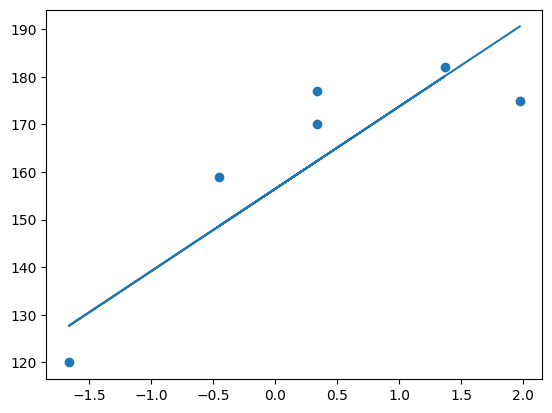

In [117]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,regressor.predict(X_test))

In [118]:
## Performance Matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [123]:
mse=mean_squared_error(Y_test,y_pred_test)
mae=mean_absolute_error(Y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [124]:
from sklearn.metrics import r2_score


In [127]:
score=r2_score(Y_test,y_pred_test)
print(score)

0.7360826717981276


In [128]:
regressor.predict(scaler.transform([[74]]))

g:\code\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[158.0732971]])